In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import optimize, stats
from sklearn.svm import SVR

In [2]:
np.random.seed(12345)

In [3]:
def model(x, a, b, c):
    #return a*x**2 + b*x + c
    return a*np.exp(b*x) + c

In [4]:
p = (3,-1, -5)

In [5]:
X = np.linspace(-2, 2, 1000).reshape(-1, 1)
y = model(X.ravel(), *p)

In [6]:
n = np.random.normal(size=y.size)
yn = y + n

In [7]:
popt, pcov = optimize.curve_fit(model, X.ravel(), yn, p0=p)
yhat = model(X.ravel(), *popt)
popt, pcov

(array([ 2.95213935, -1.00739407, -4.95839238]),
 array([[ 0.00684277,  0.00117457, -0.00565913],
        [ 0.00117457,  0.0002097 , -0.0009242 ],
        [-0.00565913, -0.0009242 ,  0.00591788]]))

In [8]:
svr = SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [9]:
svr.fit(X, yn)

SVR(C=100, coef0=1, gamma='auto')

In [10]:
yrhat = svr.predict(X)

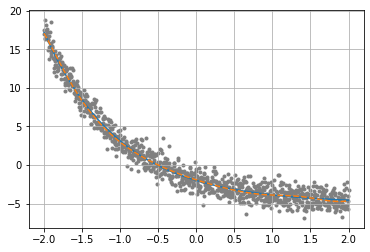

In [11]:
fig, axe =plt.subplots()
axe.scatter(X, yn, marker=".", color="gray")
axe.plot(X.ravel(), yhat)
axe.plot(X.ravel(), yrhat, "--")
axe.grid()

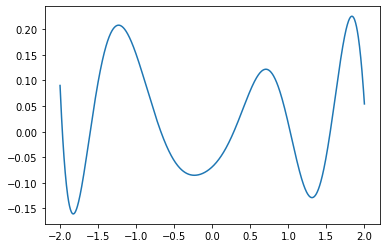

In [12]:
fig, axe =plt.subplots()
axe.plot(X, (yhat - yrhat))

In [13]:
z = stats.zscore(yrhat - yn)

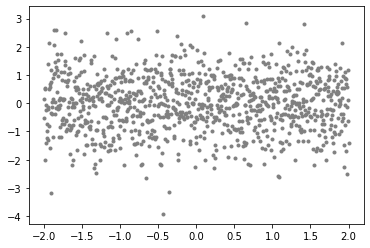

In [14]:
fig, axe =plt.subplots()
axe.scatter(X, z, marker=".", color="gray")